In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



In [ ]:

# Descrição do DataSet
# nome: Glass Identification ( Identificação de Vidro)
# Volume de dados: 213 amostras
# Descrição:

# O estudo da classificação dos tipos de vidro foi motivado pela investigação criminológica, pois fornece
# evidências  nessas investigações forenses
# Na cena do crime, o vidro deixado pode ser usado como prova se for corretamente identificado.
# O conjunto de dados é comumente usado para demonstrar algoritmos de classificação de aprendizado de máquina em ambientes acadêmicos.

# Objetivo

# O objetivo é prever com base na análise dos componentes quimicos
# em qual classe o tipo de vidro se encontra.
"""
Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""
# Colunas
#1 - ID
# 2 - Indice Refreativo 
#3 - Sodio
#4 - Magnesio
#5 - Aluminio
#6 -  Silicone
#7 - Potassio
#8 - Calcio
#9 - Barium
#10 - Ferro
#11 - Tipo


In [19]:
df = pd.read_csv('glass_data.csv')

df.columns = ["id", "indice_refrativo", "sodio", 'Magnesio', "Aluminio",
              "Silicone", "Potasion", "Calcio", "Barium", "Ferro", "tipo"]

#
#df['tipo'] = df['tipo'].apply(lambda x: (0, 1)[x <= 4])

#df_tipo = df['tipo']
# Campos nulos: Nenhum
# nulos = df.isna().sum()
# print("Campos nulos: ",nulos)

# tipos_colunas
#print("Tipos colunas: ",tipos_colunas)
#   df.dtypes

# Linha x Colunas
print(df.shape)

print(df.head(100))
#info:
print("Info: ",df.info( ))
# Descricao
describe = df.describe()
print(describe)

media_sodio = df.sodio.mean()
max_sodio = df.sodio.max()


# # print("Dados estatisticos das colunas: ")
# print(media_sodio)
# print(max_sodio)



(213, 11)
     id  indice_refrativo  sodio  Magnesio  Aluminio  Silicone  Potasion  \
0     2           1.51761  13.89      3.60      1.36     72.73      0.48   
1     3           1.51618  13.53      3.55      1.54     72.99      0.39   
2     4           1.51766  13.21      3.69      1.29     72.61      0.57   
3     5           1.51742  13.27      3.62      1.24     73.08      0.55   
4     6           1.51596  12.79      3.61      1.62     72.97      0.64   
5     7           1.51743  13.30      3.60      1.14     73.09      0.58   
6     8           1.51756  13.15      3.61      1.05     73.24      0.57   
7     9           1.51918  14.04      3.58      1.37     72.08      0.56   
8    10           1.51755  13.00      3.60      1.36     72.99      0.57   
9    11           1.51571  12.72      3.46      1.56     73.20      0.67   
10   12           1.51763  12.80      3.66      1.27     73.01      0.60   
11   13           1.51589  12.88      3.43      1.40     73.28      0.69   
12

Text(0.5,1,'Count of Glass Types')

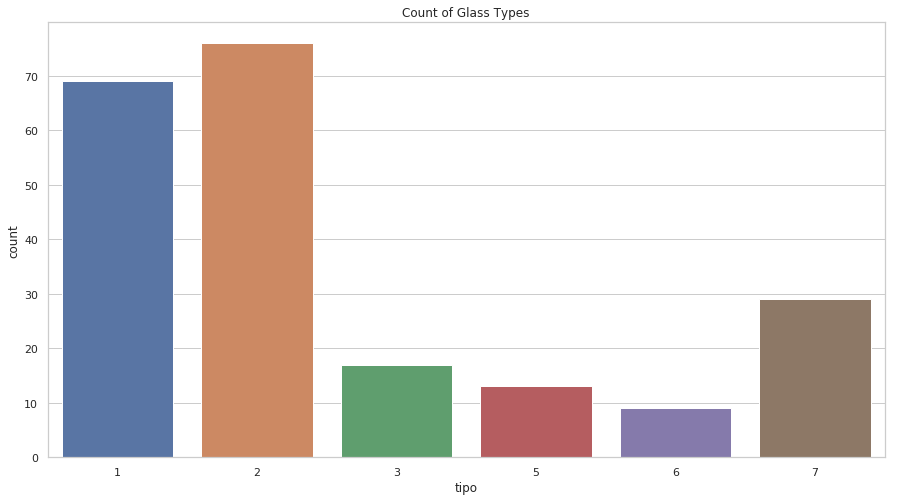

In [20]:
#sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
#df = pd.read_csv('glass_data.csv')
# ax = plt.plot(df['tipo'])
sns.countplot(x="tipo", data=df).set_title('Count of Glass Types')

In [75]:
grouBy = df.groupby('tipo',as_index=False).mean()

In [76]:
grouBy


,tipo,id,indice_refrativo,sodio,Magnesio,Aluminio,Silicone,Potasion,Calcio,Barium,Ferro
0,1,36.0,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448
